In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split as sk_split
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re
import datetime

# Load datasets
ratings = pd.read_csv('ml-latest/ratings.csv')
print ('Shape of the ratings data frame:', ratings.shape)

tags = pd.read_csv('ml-latest/tags.csv')
#print ('Shape of the tags data frame:', tags.shape)

movies = pd.read_csv('ml-latest/movies.csv')
print ('Shape of the movies data frame:', movies.shape)

#Will take
tags = tags.sample(frac=0.2)
ratings = ratings.sample(frac=0.2)

#print ('Shape of the sampled ratings data frame:', ratings.shape)
#print ('Shape of the sampled tags data frame:', tags.shape)
#print ('Shape of the sampled movies data frame:', movies.shape)

Shape of the ratings data frame: (26024289, 4)
Shape of the movies data frame: (45843, 3)


In [6]:
#Print sample ratings data
#ratings = ratings.drop(['timestamp'],axis=1)
ratings.head(n=5)

,userId,movieId,rating
2941873,30660,99007,4.0
14254686,148032,1616,2.0
5279944,54462,733,4.0
10581935,109222,56176,2.5
20987067,218118,59387,3.0


In [7]:
ratings['rating'].dtype

dtype('float64')

In [48]:
#Display summary statistics about data
ratings.describe()

,userId,movieId,rating
count,5.204858e+06,5.204858e+06,5.204858e+06
mean,1.350464e+05,1.583240e+04,3.527919e+00
std,7.818920e+04,3.105865e+04,1.065515e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,6.713800e+04,1.073000e+03,3.000000e+00
50%,1.352030e+05,2.582000e+03,3.500000e+00
75%,2.027090e+05,6.502000e+03,4.000000e+00
max,2.708960e+05,1.762690e+05,5.000000e+00


In [14]:
#Print sample tags data
tags = tags.drop(['timestamp'],axis=1)
tags.head(n=5)

,userId,movieId,tag
62106,22815,145150,Kate Winslet
739363,265073,122922,Mads Mikkelsen
370107,139640,127096,shakey
261932,96841,34405,sci-fi
283555,105471,135536,action


In [9]:
#Print sample movies data
movies.head(n=5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movies['genres'].dtype

dtype('O')

In [18]:
data = pd.merge(ratings, tags, how='inner')

print ('Shape of the joint data frame:', data.shape)
print (data.head(n=5))

Shape of the joint data frame: (26194, 4)
   userId  movieId  rating                 tag
0  206945   143385     4.5            Cold War
1  206945   143385     4.5          Historical
2   22252     7451     4.0  suprisingly clever
3   83049    55442     5.0         intelligent
4  270854      367     1.0           not funny


## 清理数据

In [51]:
for column in data.columns:
    print (column, data[column].nunique())

userId 4091
movieId 5524
rating 10
tag 7456
timestamp 25881


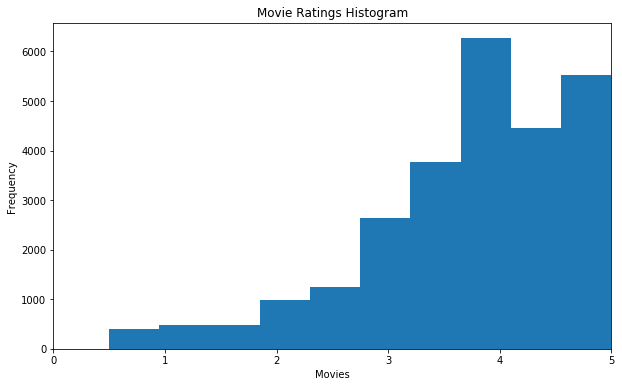

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.hist(data['rating'],10)
plt.xlabel('Movies'); 
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.title('Movie Ratings Histogram')
plt.show()

最频繁的电影评分是4，这也导致了一个不平衡的目标变量，用平均评级来可视化标签


In [19]:
#Remove any special characters from tag
#Relabel ratings 
data['rating'] = data['rating'].apply(lambda x: 1 if x > 4 else 0)

#Delete special characters
data['tag'] = data['tag'].apply(lambda x: str(x))
data['tag'] = data['tag'].map(lambda x: re.sub(r'([^\s\w]|_)+', '', x))
data['tag'] = data['tag'].str.lower()
#Convert timestamp in seconds to datetime format
#data['timestamp'] = data['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
print (data.head)

<bound method NDFrame.head of        userId  movieId  rating                    tag
0      206945   143385       1               cold war
1      206945   143385       1             historical
2       22252     7451       0     suprisingly clever
3       83049    55442       1            intelligent
4      270854      367       0              not funny
5      151569    88744       0            unrealistic
6      151569    88744       0                   apes
7      151569    88744       0                  scifi
8      151569    88744       0                 cheesy
9      186365     1200       0          james cameron
10     177035     4256       0           molly parker
11     177035     4256       0           prostitution
12      79448     1805       0           erlends dvds
13     204457     7669       1            matchmaking
14     204457     7669       1          tv miniseries
15      24455    69844       1            high school
16     108212    71248       0             infidelit

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tag'])
sequences = tokenizer.texts_to_sequences(data['tag'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

pseq = pad_sequences(sequences)
pdseq = pd.DataFrame(pseq)

Found 6697 unique tokens.


In [35]:
print (pdseq.head(n=5))

   0   1   2   3   4   5   6   7   8   9  ...   22  23  24  25  26  27  28  \
0   0   0   0   0   0   0   0   0   0   0 ...    0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0 ...    0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0 ...    0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0 ...    0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0 ...    0   0   0   0   0   0   0   

   29   30   31  
0   0  291  387  
1   0    0  144  
2   0    0  576  
3   0    0  712  
4   0  275  311  

[5 rows x 32 columns]


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',decode_error='ignore', analyzer='word')
corpus = data['tag'].values
wordvec = vectorizer.fit_transform(corpus.ravel())
wordvec = wordvec.toarray()

words = vectorizer.get_feature_names()
print("number of words in plot summary: ", len(words))
pdwordvec = pd.DataFrame(wordvec,columns=words)

number of words in plot summary:  6526


## 降维：K-Means Clustering Words using Glove Embeddings

- Load Stanford's global word 作为预先训练的模型

In [12]:
embeddings_index = {}
f = open('glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((len(words), 100))
for i in range(len(words)):
    embedding_vector = embeddings_index.get(words[i])
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
pdembedding = pd.DataFrame(embedding_matrix.T,columns=words)

Found 400000 word vectors.


In [13]:
pdembedding[0:5]

,007,0610,0710,10,100,1001,1022008,1209,15,15th,...,zombies,zone,zooey,zoolander,zoom,zsigmond,zuckerman,zurich,zwick,øvredal
0,1.01850,0.17295,0.305640,0.086759,0.281330,0.508030,0.0,0.17243,0.157570,-0.071915,...,-0.15087,-0.31103,0.70692,0.57193,-0.29085,0.026045,-0.20989,0.95108,0.251150,0.0
1,-0.41461,0.15432,-0.349320,0.343100,0.752390,0.070279,0.0,-0.12478,0.075029,-0.256100,...,0.20890,-0.33984,0.63465,-0.78349,-0.74976,-0.541090,-0.74846,-0.43729,0.649930,0.0
2,1.25320,-0.32750,-0.077694,0.015262,-0.055879,0.944470,0.0,0.10242,-0.120950,0.754700,...,0.75442,1.03080,-0.45704,0.43520,-0.29966,-0.253740,-0.53815,0.49931,-0.246510,0.0
3,-0.03777,0.14897,0.324260,-0.211760,0.165300,0.222260,0.0,0.34112,-0.096086,0.503350,...,-0.81336,-0.13911,-0.77984,0.21196,-0.16288,0.329230,-1.00320,0.33102,-1.113800,0.0
4,-0.20713,-0.92859,-0.917060,0.016745,0.312520,0.419850,0.0,-0.52915,0.243910,0.562010,...,-0.20850,-0.67825,-0.62618,-0.91360,0.48252,0.514350,-0.11899,0.32427,-0.049978,0.0


In [14]:
reduced_data = PCA(n_components=2,svd_solver='auto').fit_transform(pdembedding.T)
kmeans = KMeans(init='k-means++', n_clusters=100, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh
h =0.02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


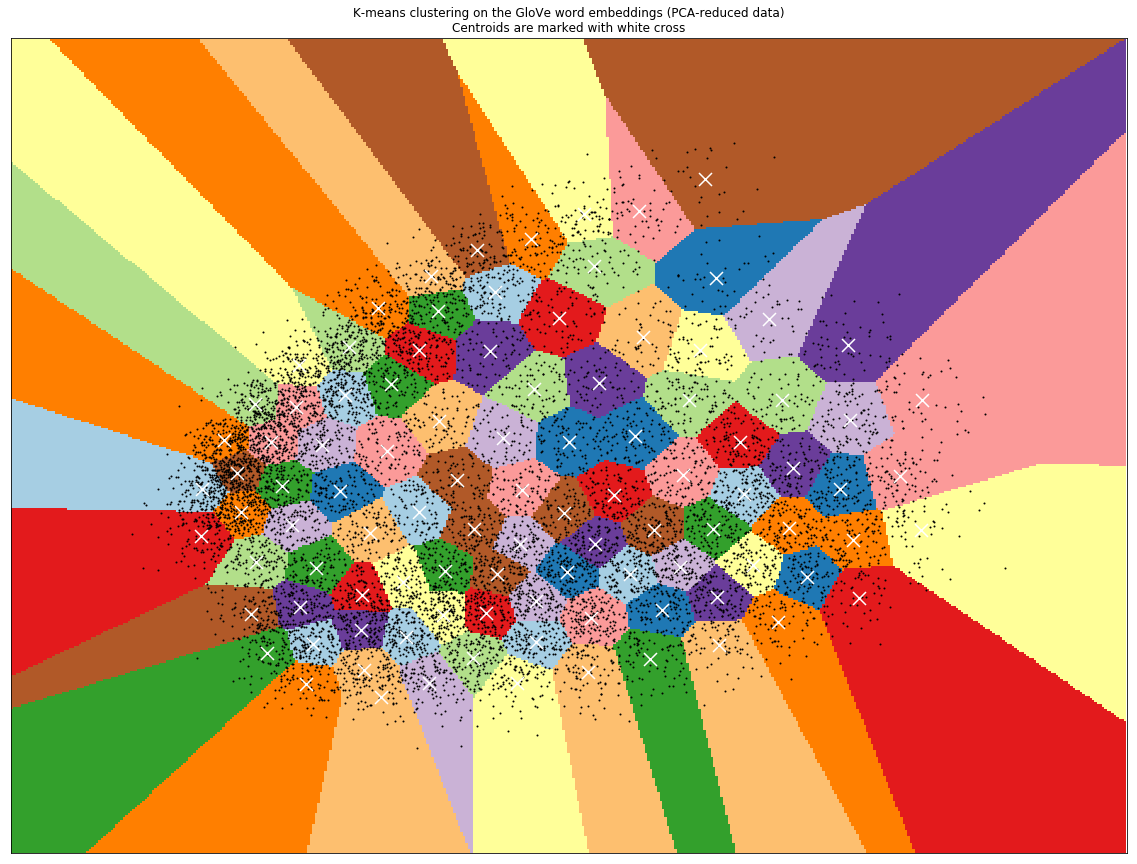

In [15]:
plt.figure(figsize=(20, 15))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', label=words,markersize=2)
        
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the GloVe word embeddings (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

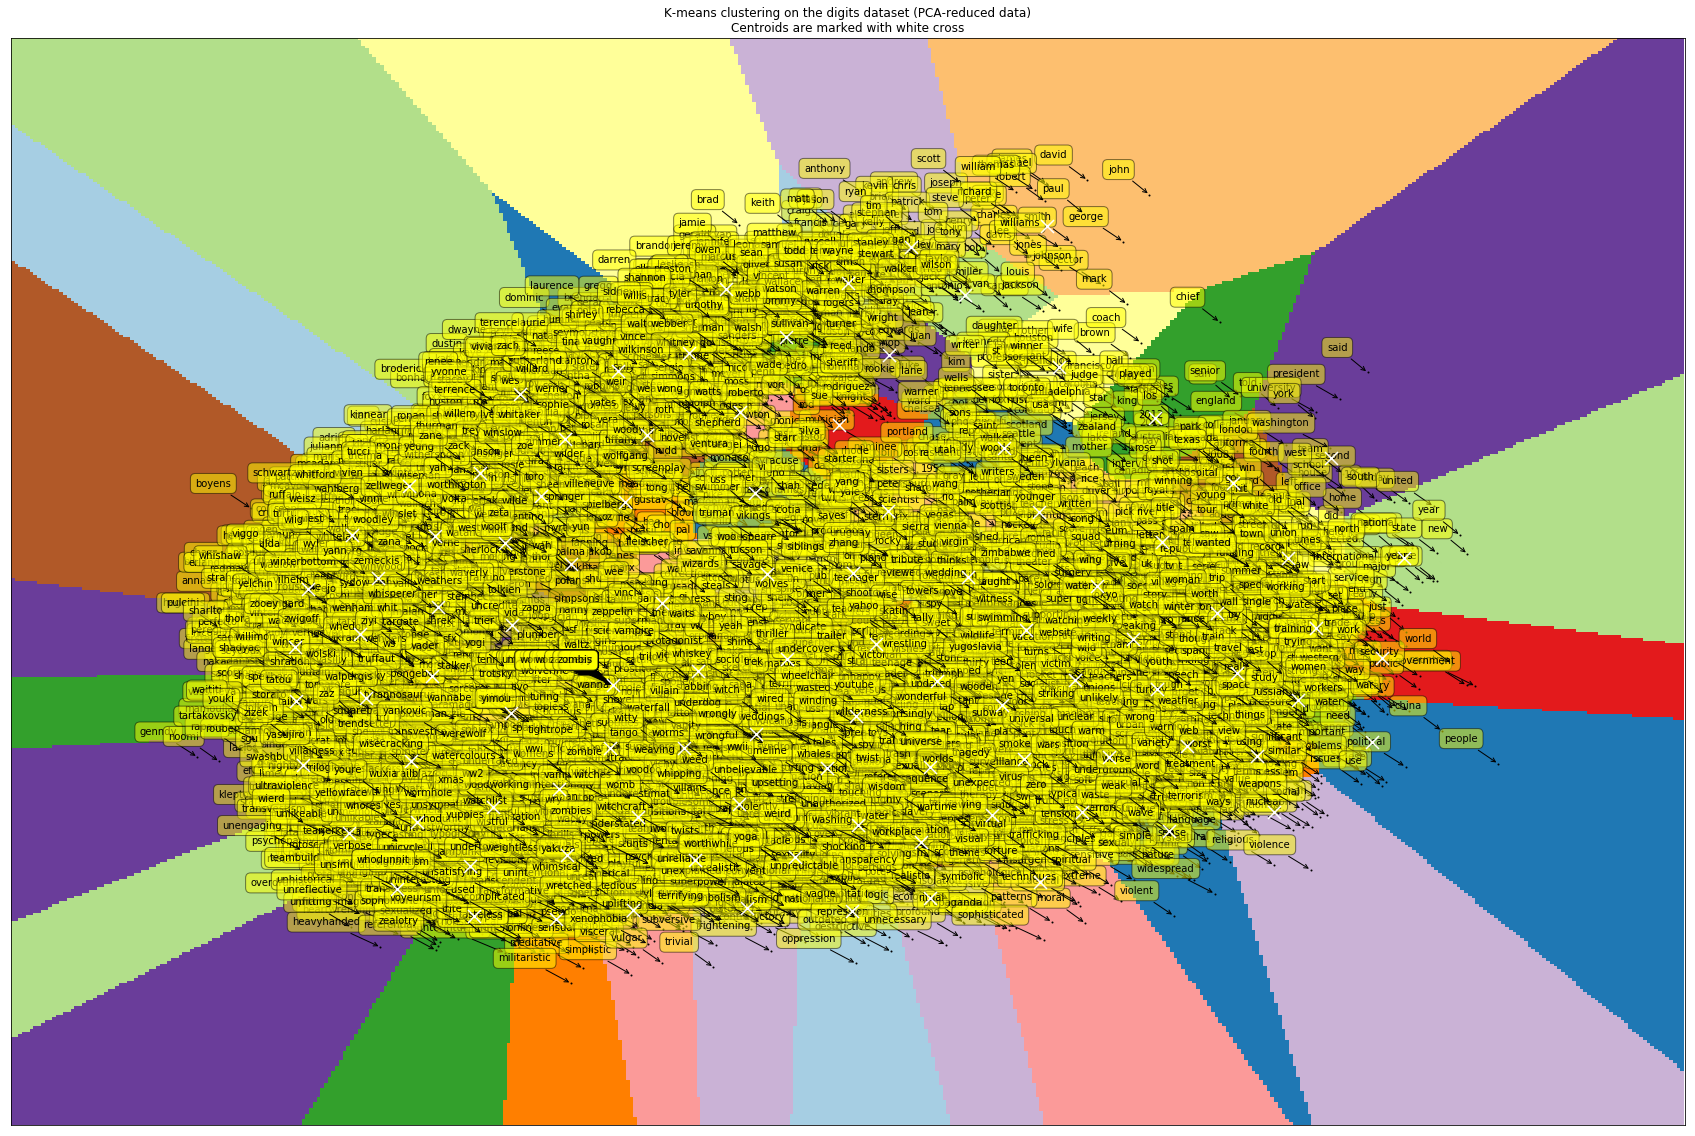

In [18]:
plt.figure(figsize=(30, 20))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', label=words,markersize=2)
for label, x, y in zip(words, reduced_data[:, 0], reduced_data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Prepare data for Clustering

In [38]:
#Cluster word embeddings data 
kmeans = KMeans(init='k-means++', n_clusters=300, n_init=10)
kmeans.fit(pdembedding.T)
#Get cluster labels
clusters = kmeans.labels_

#Add columns to data for each cluster
for i in range(max(clusters)+1):
 data[i] = 0

#If word is in data row, label the associated cluster accordingly with 1
for i in range(len(pdwordvec.columns)):
    column = pdwordvec.columns[i]
    index = pdwordvec[column].loc[pdwordvec[column] > 0, ].index
    for ii in range(len(index)):
        data.loc[index[ii],clusters[i]] = 1

In [39]:
print(data.head(5))

     userId  movieId  rating          tag            timestamp    0    1    2  \
0   79448.0   1077.0     0.0  woody allen  2006-12-03 01:08:29  0.0  0.0  0.0   
1  122892.0  27803.0     1.0    emotional  2010-07-11 06:28:39  0.0  0.0  0.0   
2   56390.0  44674.0     0.0        india  2017-01-16 00:33:07  0.0  0.0  0.0   
3   57458.0      6.0     1.0     visceral  2016-08-25 12:29:33  0.0  0.0  0.0   
4   57458.0      6.0     1.0    al pacino  2016-08-25 12:29:15  0.0  0.0  0.0   

     3    4 ...   290  291  292  293  294  295  296  297  298  299  
0  0.0  0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 305 columns]


In [20]:
#Drop tag as we will use vectorized words
data = data.drop(['tag'], axis=1)
print(data)


       userId  movieId  rating
0      206945   143385       1
1      206945   143385       1
2       22252     7451       0
3       83049    55442       1
4      270854      367       0
5      151569    88744       0
6      151569    88744       0
7      151569    88744       0
8      151569    88744       0
9      186365     1200       0
10     177035     4256       0
11     177035     4256       0
12      79448     1805       0
13     204457     7669       1
14     204457     7669       1
15      24455    69844       1
16     108212    71248       0
17     108212    71248       0
18     108212    71248       0
19     135375   115713       0
20     198578     1961       1
21     198578     1961       1
22     198578     1961       1
23     246539    34405       0
24     246539    34405       0
25     246539    34405       0
26     246539    34405       0
27     246539    34405       0
28     246539    34405       0
29     246539    34405       0
...       ...      ...     ...
26164  1

In [26]:
#Add genres
#Split genre column
genresplit = movies.set_index('movieId').genres.str.split(r'|', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
#Use one-hot encoding grouped by genre 
genres = pd.get_dummies(genresplit, prefix='genre', columns=['genre']).groupby(level=0).sum()
#Drop unnecessary field, if all genres are 0 then it means no genres are listed. 
genres = genres.drop(['genre_(no genres listed)'], axis=1)
#Join data by movieId
genres['movieId'] = genres.index
data = pd.merge(data, genres, on='movieId', how='left')
print(data)


KeyError: 'movieId'

In [24]:
#Assign variables as categorical using one hot encoding
useridencoding = pd.get_dummies(data['userId'], prefix='userid')
data = data.drop(['userId'], axis=1)
data = pd.concat([data, useridencoding], axis=1)

movieidencoding = pd.get_dummies(data['movieId'], prefix='movieid')
data = data.drop(['movieId'], axis=1)
data = pd.concat([data, movieidencoding], axis=1)
data = data.fillna(np.nan)

In [25]:
data

,rating,genre_Action_x,genre_Adventure_x,genre_Animation_x,genre_Children_x,genre_Comedy_x,genre_Crime_x,genre_Documentary_x,genre_Drama_x,genre_Fantasy_x,...,movieid_172481,movieid_172553,movieid_172557,movieid_172613,movieid_172699,movieid_172813,movieid_173007,movieid_174053,movieid_174415,movieid_174755
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning Classification Models

选择了精确度作为关键指标

将在2016-2016年之前使用这些数据作为训练集，并使用剩下的12个月的数据作为测试集。

In [59]:
#Convert timestamp in seconds to datetime format
#train = data[(data['timestamp'] < '2016-11-01') ]
#test = data[(data['timestamp'] >= '2016-11-01') ]
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)
#随机选择20%作为测试集，剩余作为训练集
print ("Number of rows in training data set:",(len(train)))
print ("Number of rows in test data set:", (len(test)))

Number of rows in training data set: 21008
Number of rows in test data set: 5252


12 months of data with 4k cases will definitely provide a good model accuracy measure. 

In [60]:
#remove timestamp as it won't be needed for modeling
train = train.drop(['timestamp'], axis=1)
test = test.drop(['timestamp'], axis=1)

In [61]:
#Define target and predictor variables
y_train = train['rating']
y_test = test['rating']
x_train = train.drop(['rating'], axis=1)
x_test = test.drop(['rating'], axis=1)

In [1]:
x_test

NameError: name 'x_test' is not defined

In [63]:
#基准准确率线
baselineaccuracy = float(y_test.value_counts().max())/y_test.value_counts().sum()
print ("Accuracy of the baseline model is: ", np.round(baselineaccuracy,4))

Accuracy of the baseline model is:  0.6264


## Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 1, class_weight='balanced')
logreg.fit(x_train, y_train)
y_predlog = logreg.predict_proba(x_test)
R2_log = logreg.score(x_test,y_test) 
print ("Accuracy of the test set for log. reg. is: ", np.round(R2_log,4))

Accuracy of the test set for log. reg. is:  0.7776


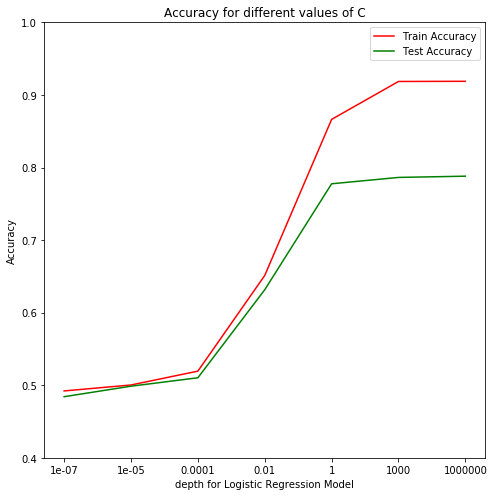

Accuracy is maximum at depth 1000000 and accuracy 0.7881


In [67]:
depth = [0.0000001,0.00001,0.0001,0.01, 1, 1000, 1000000]

train_acc = []
test_acc = []

for i in depth:
    logit = LogisticRegression( C = i, class_weight='balanced')
    logit.fit(x_train, y_train)
    train_acc.append(logit.score(x_train, y_train))
    test_acc.append(logit.score(x_test, y_test))

#Visualize accuracy for different regularization parameters
plt.figure(figsize=(7,7))
plt.plot(train_acc, color='r', label='Train Accuracy')
plt.plot(test_acc, color='g', label='Test Accuracy')
plt.xticks(range(7), depth)
plt.xlabel('depth for Logistic Regression Model')
plt.ylabel('Accuracy')
plt.ylim(0.4,1)
plt.title('Accuracy for different values of C')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print('Accuracy is maximum at depth', depth[np.argmax(test_acc)],'and accuracy', round(max(test_acc), 4))


## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(bootstrap=True, class_weight='balanced',criterion='gini',random_state=None,verbose=0, warm_start=False)
RFC.set_params(n_estimators=100)
RFC.fit(x_train,y_train)
y_pred = RFC.predict_proba(x_test)
R2_rfc = RFC.score(x_test,y_test) 
print ("Accuracy of the test set for random forest is: ", np.round(R2_rfc,4))

Accuracy of the test set for random forest is:  0.85


KeyboardInterrupt: 

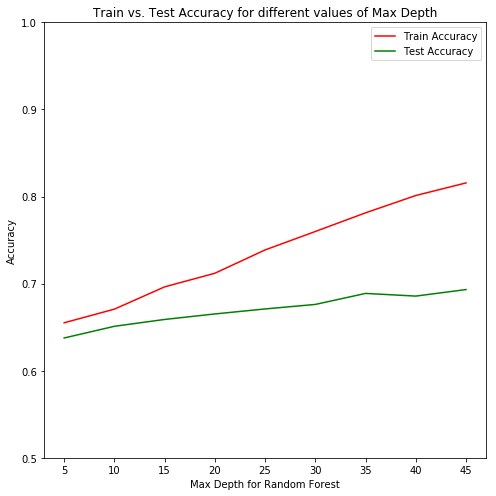

('Accuracy is maximum at max depth value of', 45, 'and yields accuracy of', 0.6932)


In [45]:
depth = xrange(5,50,5)
train_acc = []
test_acc = []

for i in depth:
    RFC.set_params(n_estimators=100, max_depth=i)
    RFC.fit(x_train, y_train)
    train_acc.append(RFC.score(x_train, y_train))
    test_acc.append(RFC.score(x_test, y_test))


#Visualize accuracy for different regularization parameters
plt.figure(figsize=(7,7))
plt.plot(train_acc, color='r', label='Train Accuracy')
plt.plot(test_acc, color='g', label='Test Accuracy')
plt.xticks(xrange(9), depth)
plt.xlabel('Max Depth for Random Forest')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.title('Train vs. Test Accuracy for different values of Max Depth')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print('Accuracy is maximum at max depth value of', depth[np.argmax(test_acc)],
                'and yields accuracy of', round(max(test_acc), 4))

In [5]:
importance = RFC.feature_importances_
importance = pd.DataFrame(importance, index=x_train.columns, 
                          columns=["Importance"])
importance["Std"] = np.std([tree.feature_importances_
                            for tree in RFC.estimators_], axis=0)

importance['Importance'].sort_values(ascending=False)[0:10]

NameError: name 'RFC' is not defined

In [215]:
importance[importance['Importance']==0].count()

Importance    2913
Std           2913
dtype: int64

In [222]:
clus = np.where(clusters==12)
clus = np.array(clus)
clus = pd.DataFrame(clus)
clussamp = clus.T.sample(10,replace=True)

clus = []
for index, row in clussamp.iterrows():
    clus.append(int(row.values))

for i in clus:
    print words[i]

scientology
religion
judaism
islam
christianity
scientology
scientology
christianity
scientology
judaism
judaism
catholicism
islam
christianity
scientology
religion
catholicism
islam
catholicism
scientology


In [38]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
NB.fit(x_train,y_train)
R2_nb = NB.score(x_test,y_test) 
print "Accuracy of the test set for Multinomial NB model is: ", np.round(R2_nb,4)

Accuracy of the test set for Multinomial NB model is:  0.758


In [40]:
from sklearn.ensemble import AdaBoostClassifier

AdaB = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=100, random_state=None)
AdaB.fit(x_train,y_train)
R2_ada = AdaB.score(x_test,y_test) 
print "Accuracy of the test set for AdaBoost model is: ", np.round(R2_ada,4)

Accuracy of the test set for AdaBoost model is:  0.6462


In [41]:
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=20, learning_rate=0.1) 
clf.fit(x_train, y_train, early_stopping_rounds=10, eval_set=[(x_train, y_train), (x_test, y_test)])  
R2_xgb = clf.score(x_test,y_test) 
print "Accuracy of the test set for XGBoost model is: ", np.round(R2_xgb,4)

[0]	validation_0-error:0.357355	validation_1-error:0.361058
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.356876	validation_1-error:0.361824
[2]	validation_0-error:0.353138	validation_1-error:0.35665
[3]	validation_0-error:0.355343	validation_1-error:0.360866
[4]	validation_0-error:0.352372	validation_1-error:0.357608
[5]	validation_0-error:0.34667	validation_1-error:0.356458
[6]	validation_0-error:0.344562	validation_1-error:0.357608
[7]	validation_0-error:0.346814	validation_1-error:0.357033
[8]	validation_0-error:0.345137	validation_1-error:0.3555
[9]	validation_0-error:0.345328	validation_1-error:0.355883
[10]	validation_0-error:0.338716	validation_1-error:0.351092
[11]	validation_0-error:0.336128	validation_1-error:0.349751
[12]	validation_0-error:0.335841	validation_1-error:0.348984
[13]	validation_0-error:0.334451	validation_1-error:0.351092

In [394]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import copy
import math

ratings = pd.read_csv('ml-latest/ratings.csv')
ratings = ratings.drop(['timestamp'], axis=1)
movies = pd.read_csv('ml-latest/movies.csv')
ratings = ratings.sample(frac=0.01)

In [395]:
def reshape_train():
    rating = copy.copy(ratings)
    movie = copy.copy(movies)
    rating['rating'] = rating['rating'].apply(lambda x: 1 if x > 3 else 0)
    genresplit = movie.set_index('movieId').genres.str.split(r'|', expand=True).stack().reset_index(level=1,drop=True).to_frame('genre')
    genres = pd.get_dummies(genresplit, prefix='genre', columns=['genre']).groupby(level=0).sum()
    genres = genres.drop(['genre_(no genres listed)'], axis=1)
    genres['movieId'] = genres.index
    data = pd.merge(rating, genres, on='movieId', how='left')
    # user_data = pd.DataFrame(user, columns=['movieName', 'movieId', 'rating', 'genres'])
    # data.append(user_data)
    data = data.drop(['userId'], axis=1)
    data = data.drop(['movieId'], axis=1)
    data = data.fillna(np.nan)
    x_train = data.drop(['rating'], axis=1)
    y_train = data['rating']
    return x_train, y_train

In [396]:
def user_matrix(array_input):
    array = copy.copy(array_input)
    all_id = [0, 0, 0, 'Action|Adventure|Animation|Children\'s|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|IMAX|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western']
    array.append(all_id)
    test = pd.DataFrame(array, columns=['movieName', 'movieId', 'rating', 'genres'])
    test['movieId'] = test['movieId'].astype(np.int64)
    test['rating'] = test['rating'].astype(np.float64).apply(lambda x: 1 if x > 2 else 0)
    genresplit_test = test.set_index('movieId').genres.str.split(r'|', expand=True).stack().reset_index(level=1,drop=True).to_frame('genre')
    genres_test = pd.get_dummies(genresplit_test, prefix='genre', columns=['genre']).groupby(level=0).sum()
    genres_test['movieId'] = genres_test.index
    test = pd.merge(test[test.columns[1:3]], genres_test, on='movieId', how='left')
    test = test.drop(['movieId'], axis=1)
    x_test = test.drop(['rating'],axis=1)
    return x_test

In [403]:
class MovieRS():
    def __init__(self):
        self.algo = None

    # 传入之前的训练集进行模型训练,使用随机森林模型
    def fit(self, x_train, y_train):
        logreg = LogisticRegression(C=10, class_weight='balanced')
        logreg.fit(x_train, y_train)
        #self.algo = logreg
        RFC = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini', random_state=None,
                                     verbose=0, warm_start=False)
        RFC.set_params(n_estimators=100)
        RFC.fit(x_train, y_train)
        self.algo = RFC

    # 对输入的用户数据进行模型拟合
    def predict(self, user, n=10):
        RFC = self.algo
        x_test = user_matrix(user)
        y_pred =RFC.predict(x_test)
        rs_id=[]
        count = 0
        for i in range(y_pred.shape[0]):
            if y_pred[i] > 0:
                count += 1
                rs_id.append(user[i])
            if count >= n:
                return rs_id
        return rs_id
    
    # 计算与要推荐的电影之间的余弦相似度
    def CosineSim(self,x, y):
        X = user_matrix(x)
        Y = user_matrix(y)
        w1=[]
        w2=[]
        sim=[]
        result = []
        for i in range(X.shape[0]-1):
            w1.append(np.dot(np.array(X),np.array(Y).T)[i].sum())
            w2.append(math.sqrt((np.array(X)**2)[i].sum())*math.sqrt((np.array(Y).T**2).sum()))
            sim.append(w1[i]/w2[i]) 
            if sim[i]>0.7:
                result.append(recommend[i])
        return result

In [404]:
user = [['21', '5350027', '3.45', 'Drama|Mystery'],
            ['22', '26797419', '3.1', 'Comedy'],
            ['23', '26654146', '2.7', 'Drama'],
            ['24', '20495023', '4.55', 'Comedy|Animation|Adventure'],
            ['25', '26340419', '4.15', 'Comedy|Animation'],
            ['26', '26661191', '2.4', 'Action'],
            ['27', '26761416', '4.3', 'Drama'],
            ['28', '82376484', '1.1', 'Mystery'],
            ['29', '21982364', '0.0', 'Action']]

recommend = [['1', '26662193','3.1','Comedy'],
             ['2','26862829', '3.9','Drama|War'],
             ['3','26966580', '2.4', 'Comedy'],
             ['4','5350027', '3.45', 'Drama|Mystery'],
             ['5','26797419', '3.1', 'Comedy'],
             ['6','26654146', '2.7', 'Drama'],
             ['7','20495023', '4.55', 'Comedy|Animation|Adventure'],
             ['8','26340419', '4.15', 'Comedy|Animation'],
             ['9','26774722', '3.05', 'Action|Crime|Mystery'],
             ['10','26729868', '2.5', 'Drama|Action|Sci-Fi'],
             ['11','26887161', '0.0', "Children's|Animation"],
             ['12','25837262', '4.3', 'Drama|Animation'],
             ['13','27193475', '0.0', "Children's|Animation"],
             ['14','26661191', '2.4', 'Action'],
             ['15','26761416', '4.3', 'Drama']]

recommend1 = [['1', '26662193','3.1','Comedy'],
             ['2','26862829', '3.9','Drama|War'],
             ['3','26966580', '2.4', 'Comedy'],
             ['4','5350027', '3.45', 'Drama|Mystery'],
             ['5','26797419', '3.1', 'Comedy'],
             ['6','26654146', '2.7', 'Drama'],
             ['7','20495023', '4.55', 'Comedy|Animation|Adventure'],
             ['8','26340419', '4.15', 'Comedy|Animation'],
             ['9','26774722', '3.05', 'Action|Crime|Mystery'],
             ['10','26729868', '2.5', 'Drama|Action|Sci-Fi'],
             ['11','26887161', '0.0', "Children's|Animation"],
             ['12','25837262', '4.3', 'Drama|Animation'],
             ['13','27193475', '0.0', "Children's|Animation"],
             ['14','26661191', '2.4', 'Action'],
             ['15','26761416', '4.3', 'Drama']]

recommend2 = [['1', '26662193','3.1','Comedy'],
             ['2','26862829', '3.9','Drama|War'],
             ['3','26966580', '2.4', 'Comedy'],
             ['4','5350027', '3.45', 'Drama|Mystery'],
             ['5','26797419', '3.1', 'Comedy'],
             ['6','26654146', '2.7', 'Drama'],
             ['7','20495023', '4.55', 'Comedy|Animation|Adventure'],
             ['8','26340419', '4.15', 'Comedy|Animation'],
             ['9','26774722', '3.05', 'Action|Crime|Mystery'],
             ['10','26729868', '2.5', 'Drama|Action|Sci-Fi'],
             ['11','26887161', '0.0', "Children's|Animation"],
             ['12','25837262', '4.3', 'Drama|Animation'],
             ['13','27193475', '0.0', "Children's|Animation"],
             ['14','26661191', '2.4', 'Action'],
             ['15','26761416', '4.3', 'Drama']]

x_train, y_train = reshape_train()
rs = MovieRS()
rs.fit(x_train, y_train)

user_movies = rs.predict(user,n=10)
result = rs.CosineSim(recommend,user_movies)
print(result)

IndexError: list index out of range

In [402]:
user_movies

[['21', '5350027', '3.45', 'Drama|Mystery'],
 ['23', '26654146', '2.7', 'Drama'],
 ['24', '20495023', '4.55', 'Comedy|Animation|Adventure'],
 ['25', '26340419', '4.15', 'Comedy|Animation'],
 ['27', '26761416', '4.3', 'Drama'],
 ['28', '82376484', '1.1', 'Mystery']]

In [390]:

X = user_matrix(recommend)
Y = user_matrix(user_movies)
w1=[]
w2=[]
sim=[]
result = []
for i in range(X.shape[0]-1):
    w1.append(np.dot(np.array(X),np.array(Y).T)[i].sum())
    w2.append(math.sqrt((np.array(X)**2)[i].sum())*math.sqrt((np.array(Y).T**2).sum()))
    sim.append(w1[i]/w2[i]) 
    if sim[i]>0.7:
        result.append(recommend[i])
        

In [391]:
result

[['4', '5350027', '3.45', 'Drama|Mystery'],
 ['6', '26654146', '2.7', 'Drama'],
 ['7', '20495023', '4.55', 'Comedy|Animation|Adventure'],
 ['8', '26340419', '4.15', 'Comedy|Animation'],
 ['12', '25837262', '4.3', 'Drama|Animation'],
 ['15', '26761416', '4.3', 'Drama']]

In [364]:
len(sim)

16